<center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/Logo-Orbe-sem-fundo.png" height="300px"></center>


# **PROJETO (parte 01): modelo de *Machine Learning* para tarefa de classificação.**



 - Observação: iremos usar o roteiro de projeto para ciência de dados (CRISP-DM) e por isso iremos inserir algumas imagens ao longo do projeto para ilustrar cada etapa do projeto.


 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_01_GERAL.png" height="300px"></center>

## **01.COMPREENSÃO DO NEGÓCIO.**


 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_02_COMPREENSAO_DO_NEGOCIO.png" height="300px"></center>

Construir um modelo de *machine learning* que classifique os clientes que pedem empréstimo como:

- Clientes **adimplentes** (pagam o empréstimo)

- Clientes **inadimplentes** (não pagam o empréstimo).


## **02.COMPREENSÃO DOS DADOS.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_03_COMNPREENSAO_DOS_DADOS.png" height="300px"></center>

### **02.a.Importar as bibliotecas necessárias.**

Vamos importar as seguintes bibliotecas:

- **Pandas:** para trabalhar com os dados.
- **Matplotlib:** para visualizar dados.
- **Ploty:** para visualizar dados.

```
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

```

In [ ]:
# IMPORTAR BIBLIOTECAS NECESSÁRIAS.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### **02.b.Importar *dataset* e criar *DataFrame*.**

- Importar do *dataset* **"dados_de_credito.csv"** e criar um *DataFrame*.


```
df = pd.read_csv('/content/dados_de_credito.csv')
```

In [ ]:
# CRIANDO O DATAFRAME DE CREDITO
df = pd.read_csv('/content/dados_de_credito.csv')

### **02.c.Ver os atributos e as primeiras linhas do *DataFrame*.**

- Visualizar as primeiras linhas do *DataFrame* com o método **`head( )`**.

````
df.head( )
````


In [ ]:
# PRIMEIRAS LINHAS
df.head()

,clientid,income,age,loan,default
0,1.0,66155.93,59.02,8106.53,0.0
1,2.0,34415.15,48.12,6564.75,0.0
2,3.0,57317.17,63.11,8020.95,0.0
3,4.0,42709.53,45.75,6103.64,0.0
4,5.0,66952.69,18.58,8770.10,1.0


### **02.d.Alterar os nomes dos atributos para língua portuguesa.**

- Isso poderá nos deixar mais confortável com os vocabulários ao longo do projeto.

- Alterar os nomes dos atributos com o método **`rename( )`**:

 - Usar um dicionário onde a **chave** do item do dicionário será o valor atual do atributo e o **valor** do item será o novo valor (nome do atributo traduzido para língua portuguesa).

````
df.rename(columns={"clientid":'clientid',
                   'income': 'SALARIO',
                   'age':'IDADE',
                   'loan':'EMPRESTIMO',
                   'default':'INADIMPLENTE'}, inplace=True)
````


In [ ]:
# TROCANDO OS NOMES DOS ATRIBUTOS
df.rename(columns={"clientid":'clientid',
                   'income': 'SALARIO',
                   'age':'IDADE',
                   'loan':'EMPRESTIMO',
                   'default':'INADIMPLENCIA'}, inplace=True)

### **02.e.Dicionário dos atributos.**

- Construir um dicionário com o significado de cada atributo.

- Isso é muito importante para entendermos o que cada atributo significa, principalmente quando o *DataFrame* possui dados de áreas de conhecimento que não conhecemos muito.

- **Dicionário de atributos:**

 - **`clientid`**: identidade do cliente.
   - É um número único para cada cliente, assim como cada um tem um número de RG único.
 - **`SALARIO`**: salário anual do cliente.
 - **`IDADE`**: idade do cliente.
 - **`EMPRESTIMO`**: valor do empréstimo cedido ao cliente.
 - **`INADIMPLENCIA`**: indica se o cliente é ou não inadimplemte (não paga o empréstimo).
   - 0 = adimplente (paga o empréstimo).
   - 1 = inadimplemnte (não paga o empréstimo). 

### **02.f.Entender o formato do *DataFrame*.**

- Entender o formado do *DataFrame* com a propriedade **`shape`**.

````
df.shape
````

In [ ]:
# FORMATO DO DATAFRAME
df.shape

(2000, 5)

### **02.g.Entender o tipo de dado de cada atributo.**

- Entender os tipos de dados de cada atributo com a propriedade **`dtypes`**.

````
df.dtypes
````


In [ ]:
# TIPOS DE DADOS DO ATRIBUTO
df.dtypes

clientid         float64
SALARIO          float64
IDADE            float64
EMPRESTIMO       float64
INADIMPLENCIA    float64
dtype: object

### **02.h.Verificar se há valores ausentes em cada atributo.**

- Verificar valores ausentes com os métodos **`isnull()`** e **`sum()`**.

````
df.isnull().sum()
````


In [ ]:
# VERIFICANDO VALORES AUSENTES
df.isnull().sum()

clientid         0
SALARIO          0
IDADE            3
EMPRESTIMO       0
INADIMPLENCIA    0
dtype: int64

### **02.i.Entender os valores únicos do atributo alvo INADIMPLENCIA.**

- Entender os valores únicos do atributo **`INADIMPLENCIA`** com o método **`unique( )`**.

````
df.INADIMPLENCIA.unique()
````


In [ ]:
# VALORES ÚNICOS DO ATRIBUTO ALVO
df.INADIMPLENCIA.unique()

array([0., 1.])

### **02.j.Entender a quantidade de cada classe do atributo alvo `INADIMPLENCIA`.**

- Contar a quantidade de cada valor do atributo **`INADIMPLENCIA`**.

````
df.INADIMPLENCIA.value_counts()
````


In [ ]:
# CONTAR VALORES DO ATRIBUTO ALVO.
df.INADIMPLENCIA.value_counts()

0.0    1717
1.0     283
Name: INADIMPLENCIA, dtype: int64

### **02.k.Visualizar a quantidade de valores de cada classe do atributo alvo `INADIMPLENCIA`.**

- Criar um gráfico de barras para **comparar a quantidade de valores em cada classe** do atributo alvo **`INADIMPLENCIA`**.

````
fig, ax_01 = plt.subplots()

df.INADIMPLENCIA.value_counts().plot(kind='bar', ax=ax_01);
`````



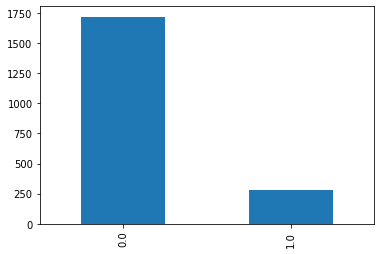

In [ ]:
# VIZUALIZANDO CLASSES DO ATRIBUTO ALVO INADIMPLENCIA.
fig, ax_01 = plt.subplots()

df.INADIMPLENCIA.value_counts().plot(kind='bar', ax=ax_01);

### **02.l.Descrever os dados estatísticos de cada atributo.**

- Descrever os dados estatísticos de cada atributo com o método **`describe()`**.

````
df.describe( )
`````


In [ ]:
# DESCREVER OS DADOS ESTATÍSTICOS
df.describe()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.599930,40.807661,4444.369635,0.141500
std,577.494589,14326.327142,13.624541,3045.409995,0.348624
min,1.000000,20014.490000,-52.420000,1.380000,0.000000
25%,500.750000,32796.457500,28.990000,1939.705000,0.000000
50%,1000.500000,45789.120000,41.320000,3974.720000,0.000000
75%,1500.250000,57791.285000,52.590000,6432.407500,0.000000
max,2000.000000,69995.690000,63.970000,13766.050000,1.000000


### **02.m.Vizualizar a frequência de idade dos clientes com um histograma.**

- Gerar um histograma para o atributo **`IDADE`**.

````
fig, ax_02 = plt.subplots()

df.IDADE.plot(kind='hist', ax=ax_02)
````


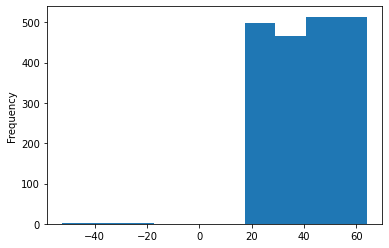

In [ ]:
# HISTOGRAMA PARA IDADE
fig, ax_02 = plt.subplots()

df.IDADE.plot(kind='hist', ax=ax_02)

### **02.n.Visualizar a distribuição de frequência dos valores do atributo `EMPRÉSTIMO`.**

- Gerar um histograma para entender a **distribuição de frequência** dos valores de empréstimo:

````
fig, ax_03 = plt.subplots()

df.EMPRESTIMO.plot(kind='hist', ax=ax_03)
````

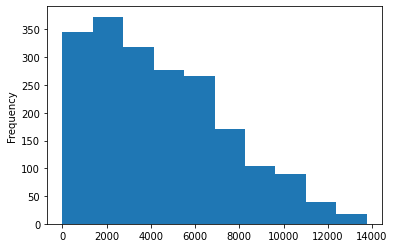

In [ ]:
# HISTOGRAMA PARA  EMPRESTIMO
fig, ax_03 = plt.subplots()

df.EMPRESTIMO.plot(kind='hist', ax=ax_03);

### **02.o.Visualizar a dispersão dos valores dos atributos numéricos com uma matriz de dispersão.**

- Usar a biblioteca **Plotly** para gerar gráfico de dispersão.

````
grafico = px.scatter_matrix(df,dimensions=['IDADE','SALARIO','EMPRESTIMO',], color = 'INADIMPLENCIA')
grafico.show()
`````


In [ ]:
# VISUALIZAR A DISPERSÃO DOS ATRIBUTOS NUMÉRICOS.
grafico = px.scatter_matrix(df,dimensions=['IDADE','SALARIO', 'EMPRESTIMO'], color = 'INADIMPLENCIA')
grafico.show()

### **02.p.Visualizar a dispersão dos dados em um gráfico 3D.**

- Antes de tudo vale lembrar que cada atributo em nosso *DataFrame* é uma dimensão em nossos gráficos.
 - Repare que nos gráficos do item anterior estamos comparando apenas 02 atributos e por isso os gráficos possuem duas dimensões. Logo os gráficos são planos.
  - Agora iremos visualizar 03 atributos em um mesmo gráfico, portanto o gráfico terá 03 dimensões e assim não será plano e sim terá um volume.
  - Nós não conseguimos gerar gráficos com 04 (ou mais) dimensões, porém apesar de não poder visualizar, podemos fazer as contas necessárias sem nenhum problema.

- Este ponto é importante para se levar em consideração principalmente quando usaremos algoritmos de aprendizagem que calculam distância entre os dados. Pois quanto mais atributos no *DataFrame*, há mais dimensões e isso dificulta o trabalho e a eficiência do algoritmo.
 - Este conceito é conhecido com '**a maldição da dimensionalidade**'. E por isso há técnicas para diminuir a dimensão (quantidade de atributos) do *DataFrame* que não são tão importantes. Porém, neste projeto não iremos aplicar nenhuma técnica, pois temos poucas dimensões nos dados deste projeto.

- Para gerar um gráfico de dispersão 3D (gráfico com 03 dimensões) com a biblioteca Plotly usaremos o método **`scatter_3d( )`** desta forma:


```
fig = px.scatter_3d(df, x='SALARIO', y='EMPRESTIMO', z='IDADE', color='INADIMPLENTE')

fig.show()
```

In [ ]:
# GERAR UM GRÁFICO DE DISPERSÃO EM 3D COM BIBLIOTECA PLOTLY.
fig = px.scatter_3d(df, x='SALARIO', y='EMPRESTIMO', z='IDADE', color='INADIMPLENCIA')

fig.show()

## **03.PREPARAR OS DADOS.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_04_PREPARACAO_DOS_DADOS.png" height="300px"></center>

### **03.a.Valores errados.**

- Já observamos é que há valores errados no atributo **`IDADE`**. Vamos entender quais valores são estes.

- Para isso há duas formas de filtramos estes valores:

 - **01.Filtro de fatia da biblioteca Pandas.**:

  ```
  df[df.IDADE<0]
  ```

 - **02.Usar o comando `loc` para localizar os valores que buscamos.**:

  ```
  df.loc[df.IDADE<0]
  ```


In [ ]:
# LOCALIZAR DADOS ERRADOS NO ATRIBUTO IDADE - COM FILTRO DE FATIA
df[df.IDADE<0]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
15,16.0,50501.73,-28.22,3977.29,0.0
21,22.0,32197.62,-52.42,4244.06,0.0
26,27.0,63287.04,-36.50,9595.29,0.0


In [ ]:
# LOCALIZAR DADOS ERRADOS NO ATRIBUTO IDADE - COM O COMANDO loc
df.loc[df.IDADE<0]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
15,16.0,50501.73,-28.22,3977.29,0.0
21,22.0,32197.62,-52.42,4244.06,0.0
26,27.0,63287.04,-36.50,9595.29,0.0


#### **03.a.Tratar as linhas com os valores errados do atributo IDADE.**

- Podemos tratar valores errados e ausentes de duas formas: excluir os os valores ou substituir por outro valor.

- Para os dados errados do atributo **`IDADE`** vamos optar por excluir estes valores por ser uma quantidade muito pequena em relação à quantidade total de dados. Para isso usaremos o método **`drop( )`** da biblioteca Pandas desta forma:

````
df = df.drop(df[df.IDADE<0].index)
`````


In [ ]:
# APAGAR AS LINHAS COM DADOS ERRADOS.
df = df.drop(df[df.IDADE<0].index)

- Para verificar esta exclusão podemos usar o método **`describe( )`** para entender o valor mínumo do atributo **`IDADE`** após a exclusão dos dados com valor menor que zero.

````
df.IDADE.describe( )
````

In [ ]:
# VERIFICANDO A EXCLUSÃO DOS VALORES MENORES DO QUE ZERO DO ATRIBUTO IDADE.
df.IDADE.describe()

count    1994.000000
mean       40.927803
std        13.271873
min        18.060000
25%        29.040000
50%        41.380000
75%        52.620000
max        63.970000
Name: IDADE, dtype: float64

- Observação: agora que excluimos os valores negativos do atributo **`IDADE`** podemos visualizar melhor o gráfico de dispersão de valores criado no item **02.o.Visualizar a dispersão dos valores dos atributos numéricos com uma matriz de dispersão.**

### **03.b.Valores ausentes.**

#### **03.b.i.Localizar as linhas com os valores ausentes.**

- Para poder **localizar** as linhas onde estão os valores ausentes, usamos o comando **`loc`** desta forma:

````
df.loc[df.IDADE.isnull()]
````

In [ ]:
# LOCALIZAR LINHAS COM VALORES AUSENTES.
df.loc[df.IDADE.isnull()]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
28,29.0,59417.81,NaN,2082.63,0.0
30,31.0,48528.85,NaN,6155.78,0.0
31,32.0,23526.30,NaN,2862.01,0.0


#### **03.b.ii.Substituir os valores ausentes com outro valor.**

- Existem várias formas para substituir um valor ausente, isso pode variar para cada caso e para saber o melhor forma é recomendado realizar testes com diferentes caminhos.
 - Neste caso usarmos a média dos valores do atributo **`IDADE`**.

- Para **preencher (*'fill'* em inglês)** os valores ausentes do atributo **`IDADE`** usaremos o método **`fillna`** desta forma:

````
df.IDADE.fillna(df.IDADE.mean(), inplace=True)
````

In [ ]:
# SUBSTITUIR OS VALORES AUSENTES COM A MÉDIA DO ATRIBUTO IDADE
df.IDADE.fillna(df.IDADE.mean(), inplace=True)

#### **03.b.iii.Verificar se ainda há valores ausentes.**

- Para verificar se ainda há valores ausentes após a operação do item anterior, usaremos os métodos **`isnull()`** e **`sum()`** desta forma:

````
df.isnull().sum()
````

In [ ]:
# VERIFICAR SE AINDA HÁ DADOS AUSENTES.
df.isnull().sum()

clientid         0
SALARIO          0
IDADE            0
EMPRESTIMO       0
INADIMPLENCIA    0
dtype: int64

### **03.c.Exportar os dados tratados.**

- Agora que já tratamos os dados, vamos exportá-los para que possamos usar no site que iremos construir para este projeto.

- Para exportar os dados com o nome **`dados_de_credito_limpo.csv`** vamos usar o método **`to_csv( ) `** e desta forma:

````
df.to_csv('dados_de_credito_limpo.csv', index=False)
````


In [ ]:
# EXPORTAR BASE DE DADOS LIMPA
df.to_csv('dados_de_credito_limpo.csv', index=False)

### **03.d.Dividir dados entre atributos preditores e atributo alvo.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_DADOS_ATRIBUTOS_PREDITORES_E_ALVO.png" height="300px"></center>

#### **03.d.i.Relembrar todos os atributos.**

- Para ficar mais claro a divisão de atributos preditores e atributo alvo (coluna **INADIMPLENCIA**), vamos relembrar os atributos com o método **`head( )`** desta forma:

````
df.head()
````


In [ ]:
# VISUALIZAR NOVAMENTE OS ATRIBUTOS COM O MÉTODO head().
df.head()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
0,1.0,66155.93,59.02,8106.53,0.0
1,2.0,34415.15,48.12,6564.75,0.0
2,3.0,57317.17,63.11,8020.95,0.0
3,4.0,42709.53,45.75,6103.64,0.0
4,5.0,66952.69,18.58,8770.10,1.0


#### **03.d.ii.Separar os atributos preditores.**

- Para **localizar** somente os atributos preditores vamos usar o comando **`iloc`**, que **localiza** uma linha ou coluna através do seu **Í**ndice numérico.

- Vale lembrar que:
 -  O atributo **`clientid`** (índice da coluna 0 'ZERO') não nos interessa e por isso não fará parte dos atributos preditores.
 - A notação para pegar fatias do *DataFrame* funciona desta forma:
   - Usamos uma "," (vírgula) para separar entre listas e colunas do *DataFrame*:
     - [**linhas**,**colunas**] 
   - Usamos ":" (dois pontos) para indicar o início e o final da nossa fatia/pedaço de dados. Observação: o índice que indica o final da nossa fatia é "não incluso", ou seja, não é incluida na nossa fatia.
     - [**linha inicial**:**linha final**,**coluna inicial**:**coluna final**]
       - neste caso, a **coluna final** não é incluida.

- Para separar os atributos preditores usamos o comando **`iloc`** desta forma:

````
X_atributos_preditores = df.iloc[:,1:4].values
````






In [ ]:
# SEPARANDO OS ATRIBUTOS PREDITORES. 
X_atributos_preditores = df.iloc[:,1:4].values

- Separar o atributo alvo (coluna **`INADIMPLENCIA`**).

- Para isso usaremos o comando **`iloc`** desta forma:

````
y_atributo_alvo = df.iloc[:,4].values
````


In [ ]:
# ATRIBUTO ALVO
y_atributo_alvo = df.iloc[:,4].values

### **03.e.Escalonar os atributos preditores.**

#### **03.e.i.Escalonamento.**

- Iremos trabalhar com o **K-NN** que é um algoritmo de aprendizagem que calcula a distância entre os dados para poder realizar a tarefa de classificação. 

- Porém, cada atributo tem valores numéricos de diferentes grandezas. Exemplo:

  - Valor máximo do atributo **`IDADE`**: 63
  - Valor máximo do atributo **`SALARIO`**: 69'995

- Para garantir que **K-NN** tenha um bom desempenho temos que realizar o **escalonamento**, ou seja, **deixar os dados em uma mesma escala** numérica.
  - Observação: segue imagem usada na aula teórica para ilustrar o **escalonamento** dos dados sobre PESO (Kg), ALTURA (cm) e TAMANHO DA CALÇA.

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_DAD0S_ESCALONAMENTO.png" height="300px"></center>

In [ ]:
# Visualizando a diferença de escala entre os valores do atributo.
df.describe()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.970456,45326.596630,40.927803,4442.124502,0.141713
std,576.679293,14327.971571,13.261895,3045.494160,0.348842
min,1.000000,20014.490000,18.060000,1.380000,0.000000
25%,503.000000,32804.900000,29.070000,1936.810000,0.000000
50%,1002.000000,45788.750000,41.320000,3971.160000,0.000000
75%,1501.000000,57787.570000,52.590000,6429.590000,0.000000
max,2000.000000,69995.690000,63.970000,13766.050000,1.000000


#### **03.e.ii.Escalonar os atributos preditores.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_DAD0S_ESCALONAMENTO_ATRIBUTOS_PREDITORES.png" height="300px"></center>


- Há várias formas de escalonamento. 
- Neste projeto usaremos a padronização (media = 0 'zero' e desvio padrão = 1).
- Para realizar o escalonamento dos atributos preditores (X_atributos_preditores) iremos usar o comando **`StandardScaler( )`** da biblioteca para algorimos de *Machine Learning* **Scikit-learn** (**`sklearn`**) desta forma:

  - **01.Importar StandardScaler:**

    ````
    from sklearn.preprocessing import StandardScaler
    ````

  - **02.Criar o objeto que irá escalonar os dados:**

    ````
    escalonador = StandardScaler()
    `````

  - **03.Escalonar os dados dos atributos preditores (X_atributos_preditores).**

    ````
    X_atributos_preditores = escalonador.fit_transform(X_atributos_preditores)
    ````


In [ ]:
# 01.IMPORTAR O StandardScaler.
from sklearn.preprocessing import StandardScaler

# 02.CRIAR O OBJETO QUE IRÁ ESCALONAR OS DADOS.
escalonador = StandardScaler()

# 03.ESCALONAR OS DADOS DOS ATRIBUTOS PREDITORES.
X_atributos_preditores = escalonador.fit_transform(X_atributos_preditores)

- Verificar o valor máximo e mínimo dos atributos preditores após o escalonamento.

  - **Valor máximo**:

  ````
  X_atributos_preditores.max()
  `````

  - **Valor mínimo**:

  ````
  X_atributos_preditores.min()
  ````



In [ ]:
# VALOR MÍNIMO
X_atributos_preditores.min()

-1.76706426431113

In [ ]:
# VALOR MÁXIMO
X_atributos_preditores.max()

3.062314477381558

### **03.f.Dividir dados em base de treino e teste.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_DADOS_TREINO_E_TESTE_A.png" height="300px"></center>

- Para dividir os dados em base de dados de treino e base de dados de teste, temos que importar da biblioteca **scikit-learn** o comando **`train_test_split`** desta forma:

  - **01.A PARTIR DA BIBLIOTECA SCIKIT-LEARN IMPORTAR COMANDO train_test_split:**

    ````
    from sklearn.model_selection import train_test_split
    ````
- Para realizar a divisão entre base de treino e base de teste usamos o método **`train_test_split`** da seguinte forma:
   - parâmetro **`test_size`**:
     -  é o tamanho da base de teste. Neste caso está como **`0.25`**, ou seja, 25% dos dados. (não é uma regra para esta quantidade e com o tempo aprenderemos formas mais avançadas de dividir base de treino e teste). 
   - parâmetro **`random_state`**:
     - indica se no momento de dividir os dados entre base de treino e de teste, irá pegar os dados de forma randômica/aleatória ou não. Neste caso atribui o valor **`0`** 'Zero' para os dados não sejam selecionados de forma randômica e assim garatir que o resultado do meu projeto seja extamente igual a de cada aluno.

  - **02.DIVIDIR DADOS ENTRE TREINO E TESTE - ATRIBUTOS PREDITORES E ATRIBUTO ALVO:**
    ```
    X_treino, X_teste, y_treino, y_teste = train_test_split(X_atributos_preditores,y_atributo_alvo, test_size=0.25, random_state=0)
    ```

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_DADOS_TREINO_E_TESTE_B.png" height="300px"></center>


In [ ]:
# 01.A PARTIR DA BIBLIOTECA SCIKIT-LEARN IMPORTAR COMANDO train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# 02.DIVIDIR DADOS ENTRE TREINO E TESTE - ATRIBUTOS PREDITORES E ATRIBUTO ALVO.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_atributos_preditores,y_atributo_alvo, test_size=0.25, random_state=0)

In [ ]:
# QUANTIDADE DE LINHAS E CULUNAS DE X_treino.
print("Quantidade de linhas e colunas de X_treino: {} ".format(X_treino.shape))

Quantidade de linhas e colunas de X_treino: (1497, 3) 


In [ ]:
# QUANTIDADE DE LINHAS E CULUNAS DE X_teste.
print("Quantidade de linhas e colunas de X_teste: {} ".format(X_teste.shape))

Quantidade de linhas e colunas de X_teste: (500, 3) 


In [ ]:
# QUANTIDADE DE LINHAS E CULUNAS DE y_treino.
print("Quantidade de linhas e colunas de y_treino: {} ".format(y_treino.shape))

Quantidade de linhas e colunas de y_treino: (1497,) 


In [ ]:
# QUANTIDADE DE LINHAS E CULUNAS DE y_teste.
print("Quantidade de linhas e colunas de y_teste: {} ".format(y_teste.shape))

Quantidade de linhas e colunas de y_teste: (500,) 


In [ ]:
y_teste

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0.

## **04.TREINAR O MODELO DE CLASSIFICAÇÃO.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_05_MODELAGEM.png" height="300px"></center>



- Para treinamos o algortimo de aprendizagem **K-NN** com os dados de treino e assim gerar um **modelo** que realize a **tarefa de classificação**, temos que seguir os passos a seguir:

 - **01.Importar o algoritmo de aprendizagem K-NN para a tarefa de classificação:**
    `````
    from sklearn.neighbors import KNeighborsClassifier
    `````

 - **02.Usar o K-NN e seus parâmetros para criar um modelo:**
   - parâmetro **`n_neighbors`**: quantidade de vizinhos mais próximos ('K') para usar na classificação. 
   - parâmetro **`metric`**: forma de se realizar o cálculo de distância entre os dados.
   - parâmetro **`p`**: tipo de distância escolhida para realizar o cálculo de distância.
     - p=2 (distância euclidiana)
     
    `````
    modelo_knn_classificacao = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
    `````

 - **03.Treinar o modelo com os dados de treino:**
    `````
    modelo_knn_classificacao.fit(X_treino,y_treino)
    `````

<center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_TREINO.png" height="400px"></center>


 - **04.Usar o modelo  e os dados de teste (X_teste) para realizar as predições:**
    `````
    predicoes = modelo_knn_classificacao.predict(X_teste)
    `````
<center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_TESTE.png" height="400px"></center>

In [ ]:
# 01.Importar o algoritmo de aprendizagem K-NN para a tarefa de classificação.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 02.Usar o K-NN e seus parâmetros para criar um modelo.
modelo_knn_classificacao = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)

In [ ]:
# 03.Treinar o modelo com os dados de treino.
modelo_knn_classificacao.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 04.Usar o modelo e os dados de teste (X_teste) para realizar as predições.
predicoes = modelo_knn_classificacao.predict(X_teste)

## **05.AVALIAR O MODELO.**

 <center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_CRISP-DM_06_AVALIACAO.png" height="300px"></center>

<center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/M06_TESTE.png" height="400px"></center>

- Para avaliarmos o desempenho do modelo na tarefa de classificação temos que seguir o seguinte roteiro:

 - **01.A partir da biblioteca Scikit-learn importar as métricas de avaliação do desempenho do modelo de classificação:**
   - **`accuracy_score`**: nos apresenta a métrica **acurácia**.
   - **`classification_report`**: nos apresenta das métricas de **acurácia**, **precision (precisão)** e **recall**. 
 ````
 from sklearn.metrics import accuracy_score, classification_report
 ````
 - **02.Verificar a acurácia do modelo a partir dos valores de `y_teste` e `predicoes`**.
 ````
 accuracy_score(y_teste,predicoes)
 ````

 - **03.Visualizar a matriz de confusão com a biblioteca de gráficos `Yellowbrick`**:
 ````
 from yellowbrick.classifier import ConfusionMatrix
 matriz_confusao = ConfusionMatrix(modelo_knn_classificacao)
 matriz_confusao.fit(X_treino,y_treino)
 matriz_confusao.score(X_teste,y_teste)
 ````

 - **04.Verificar os valores das métricas `precision`(precisão) e `recall` a partir da comparação entre os valores de `y_teste` e `predicoes`.**
 ````
 print(classification_report(y_teste,predicoes))
 `````

In [ ]:
# 01.A partir da biblioteca Scikit-learn importar as métricas de avaliação do desempenho do modelo de classificação.
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 02.Verificar a acurácia do modelo a partir dos valores de y_teste e predicoes.
accuracy_score(y_teste,predicoes)

0.98

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.98

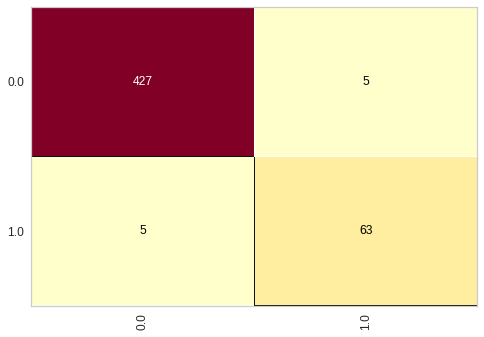

In [ ]:
# 03.Visualizar a matriz de confusão com a biblioteca de gráficos Yellowbrick
from yellowbrick.classifier import ConfusionMatrix
matriz_confusao = ConfusionMatrix(modelo_knn_classificacao)
matriz_confusao.fit(X_treino,y_treino)
matriz_confusao.score(X_teste,y_teste)

In [ ]:
# 04.Verificar os valores das métricas precision(precisão) e recall a partir da comparação entre os valores de y_teste e predicoes
print(classification_report(y_teste,predicoes))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       432
         1.0       0.93      0.93      0.93        68

    accuracy                           0.98       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

